In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv(r"C:\Users\anton\OneDrive\Área de Trabalho\Repositórios\books_to_scrape_webscraping_project\books_scraped.csv", index_col=None)
df.head()

,Unnamed: 0,title,category,price,rating,availability
0,0,A Light in the Attic,Poetry,51.77,Three,In stock (22 available)
1,1,Tipping the Velvet,Historical Fiction,53.74,One,In stock (20 available)
2,2,Soumission,Fiction,50.10,One,In stock (20 available)
3,3,Sharp Objects,Mystery,47.82,Four,In stock (20 available)
4,4,Sapiens: A Brief History of Humankind,History,54.23,Five,In stock (20 available)


In [10]:
df.dtypes

Unnamed: 0         int64
title             object
category        category
price            float64
rating            object
availability      object
dtype: object

In [9]:
df['category'] = df['category'].astype("category")

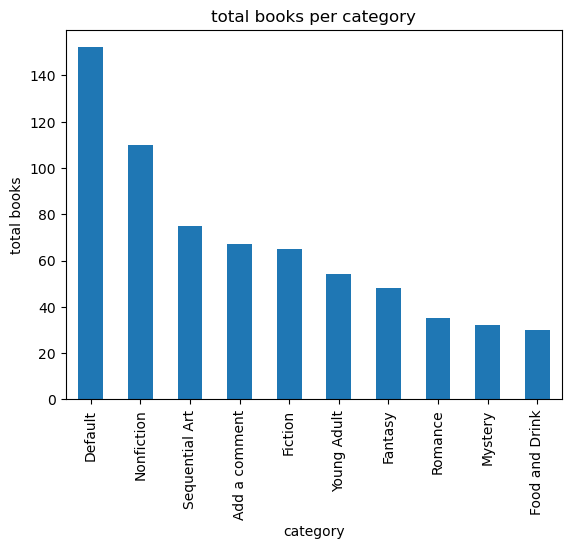

In [36]:
df['category'].value_counts().head(10).plot(kind='bar', title='total books per category')
plt.ylabel("total books")
plt.xlabel("category")
plt.show()

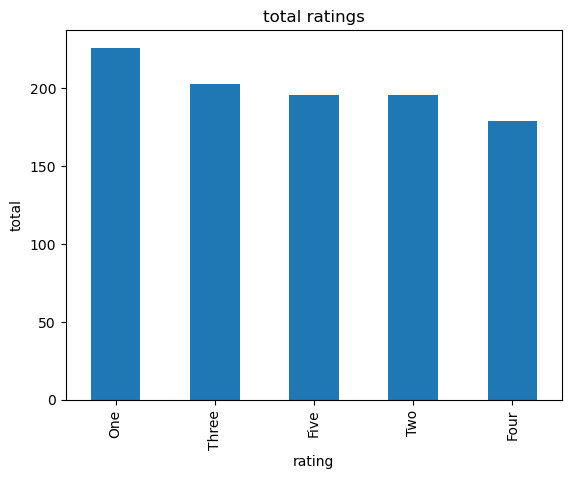

In [34]:
df['rating'].value_counts().plot(kind='bar', title='total ratings')

plt.ylabel("total")
plt.xlabel("rating")
plt.show()

<Axes: title={'center': 'average book price per category'}, xlabel='category'>

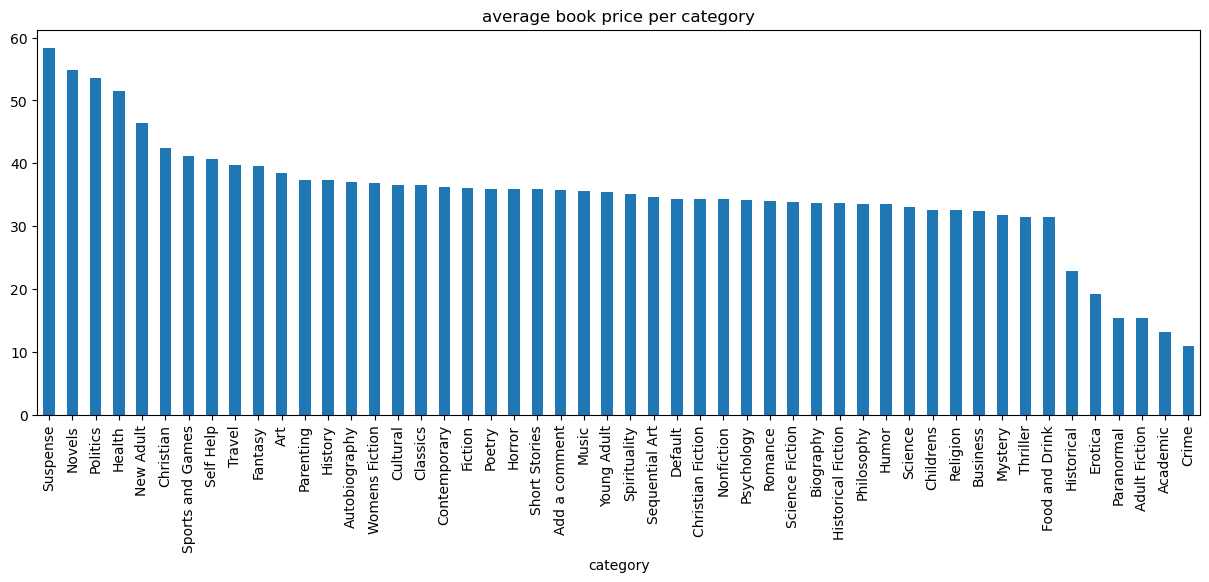

In [37]:
df.groupby('category')['price']\
    .mean()\
    .sort_values(ascending=False)\
    .plot(kind='bar', figsize = (15,5), title='average book price per category')

<Axes: title={'center': '5 least expensive books'}, xlabel='title'>

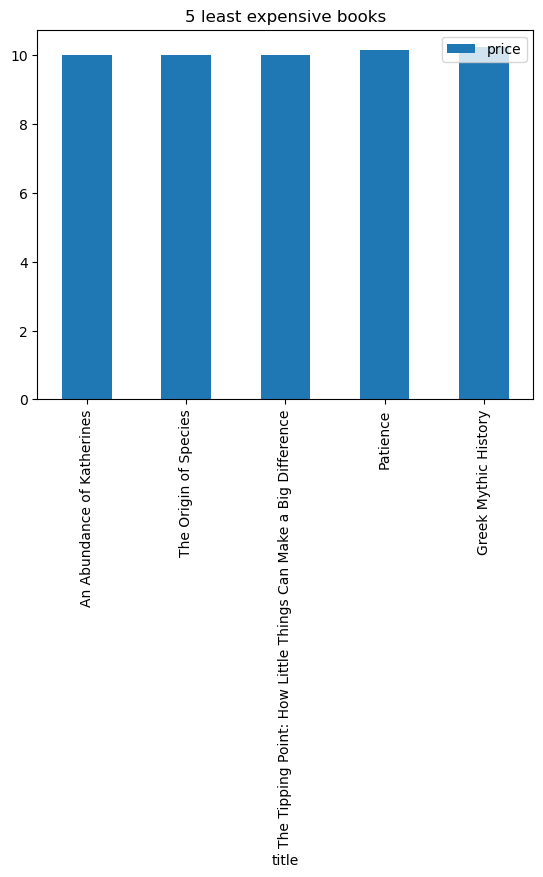

In [67]:
five_most_expensive_books = df[['title','price']].sort_values('price').head(5)
five_most_expensive_books.set_index('title').plot(kind='bar', title='5 least expensive books')

In [ ]:
five_least_expensive_books = df[['title','price']].sort_values('price', ascending=False).head(5)
five_least_expensive_books.set_index('title').plot(kind='bar', title='5 most expensive books')

In [71]:
#creating a conditional column

conditions = [df['rating'] == 'One', 
              df['rating'] == 'Two',
              df['rating'] == 'Three',
              df['rating'] == 'Four',
              df['rating'] == 'Five']
choices = [1, 2, 3, 4, 5]

df['rating_value'] = np.select(conditions, choices, default=0)

In [82]:
# price and rating are not correlated. Higher price does not mean higher rating.

df[['price', 'rating_value']].corr()

,price,rating_value
price,1.000000,0.028166
rating_value,0.028166,1.000000
